# ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤCustomer Segmentation

 >### Importing Libraries :

In [25]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Reading The Dateset

In [26]:
df=pd.read_csv(r"D:\Class 2020\Datasets\Mall_Customers.csv")

In [27]:
#show first 5 rows in data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Checking on shape of  DataFrame

In [28]:
print('Number of row are',df.shape[0], 'Number of columns are', df.shape[1])

Number of row are 200 Number of columns are 5


# Checking for null values

In [29]:
dict={}
for i in list(df.columns):
    dict[i]=df[i].isnull().sum()
pd.DataFrame(dict,index=['number of null values']).transpose() 

,number of null values
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


# Checking on datatypes of the attributes

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Conclusions:
No null value in the dataset.

gender is of dtype object, which needs to be taken care of

# Checking Statistical Data 

In [31]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Conclusion:
 • Average age of customer is 38.
 
 • customers  visiting the mall have age between 18-70.
 
 •  avg annual income : 60k$

# ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤData Visualization

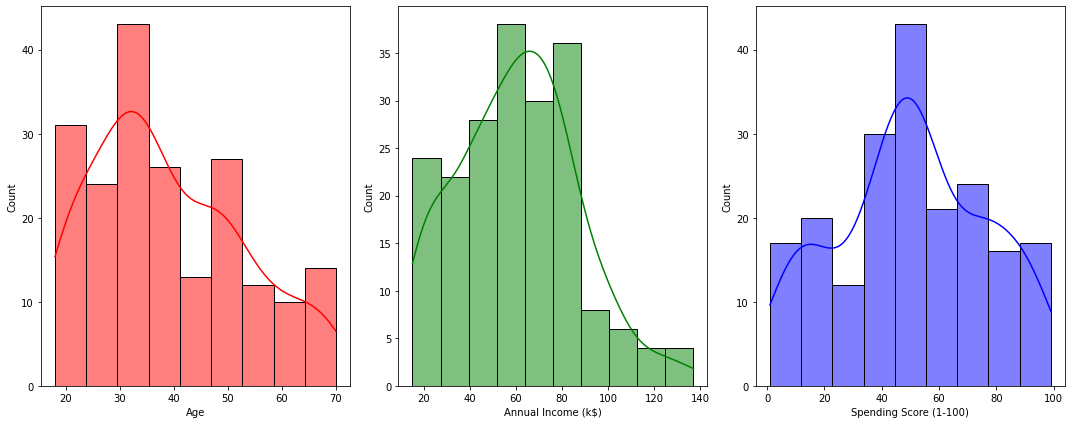

In [32]:
fig, (ax1, ax2,ax3) = plt.subplots(nrows=1, ncols=3,figsize=(15,6))
sns.histplot(ax=ax1,x=df.Age, color="red", label="Age", kde= True)
sns.histplot(df['Annual Income (k$)'] , color="green", label="Resting Blood Pressure", kde= True,ax=ax2)
sns.histplot(df['Spending Score (1-100)'], color="blue", label="Resting Blood Pressure", kde= True,ax=ax3)

plt.tight_layout()

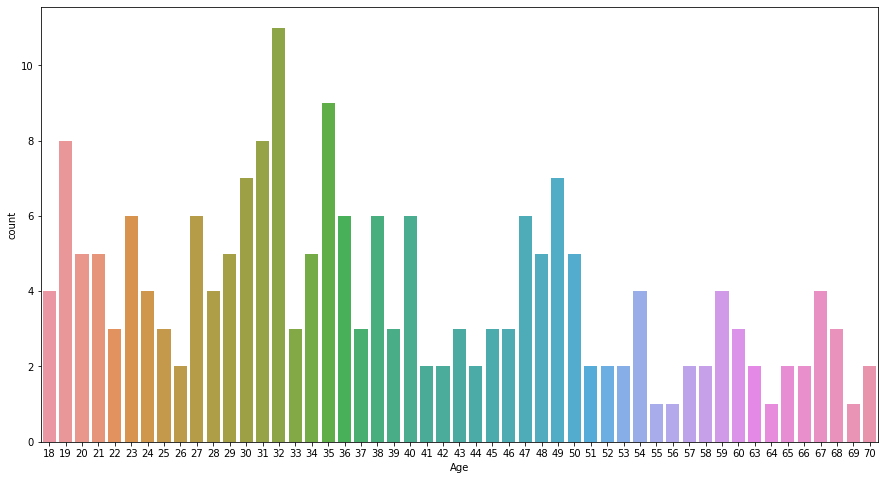

In [33]:
plt.figure(figsize = (15,8))
sns.countplot(data = df, x = 'Age');

In [34]:
index=['Female','Male']

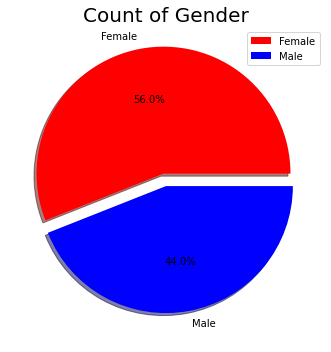

In [35]:
plt.figure(figsize=(5,5))
plt.pie(df.Gender.value_counts(),colors=['red', 'blue'],explode=[0.1,0],shadow=True,
        labels=index,
        autopct='%1.1f%%');
plt.title('Count of Gender', fontsize=20)
plt.legend()
plt.tight_layout()

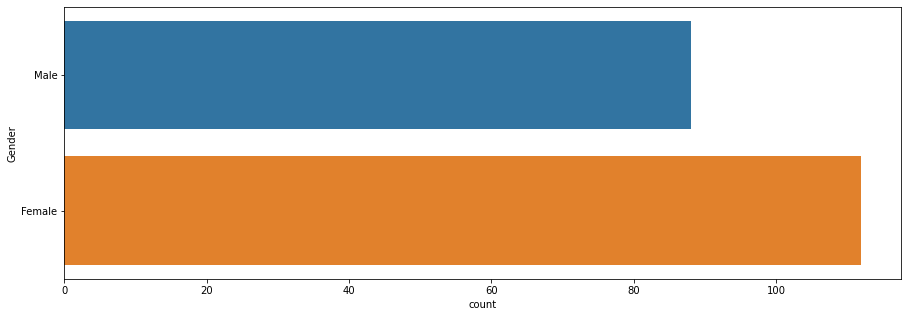

In [36]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

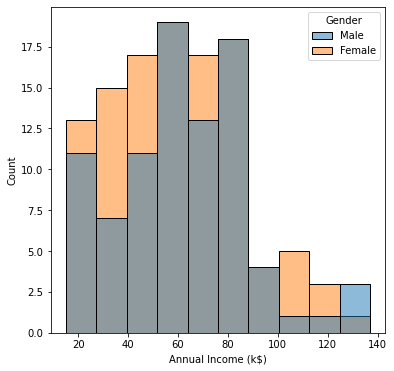

In [37]:
# show the annual income distribution wrt the gender 
plt.figure(figsize = (6,6))
sns.histplot(df, x = 'Annual Income (k$)', hue = 'Gender');

In [38]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df.Gender = enc.fit_transform(df.Gender)
df.drop('CustomerID', axis = 1, inplace = True)

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [39]:
lst = []
for i in range(1,11):
    kmodel = KMeans(n_clusters = i, n_init = 15, max_iter = 500) 
    kmodel.fit(df)
    lst.append(kmodel.inertia_)
lst

[308862.06000000006,
 212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75412.59682443162,
 58348.64136331505,
 51132.70321257687,
 44391.82080487078,
 40857.18667502088,
 37439.23258525102]

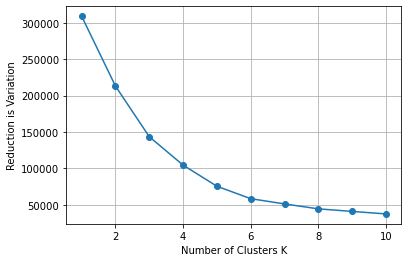

In [40]:
plt.plot(range(1,11), lst, marker = 'o')
plt.xlabel('Number of Clusters K')
plt.ylabel('Reduction is Variation')
plt.grid()

Best K number should select to fit = 5 

In [41]:
kmodel = KMeans(n_clusters = 5)
kmodel.fit(df)
prediction = kmodel.predict(df)
kmodel.cluster_centers_

array([[ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.4125    , 42.9375    , 55.0875    , 49.7125    ],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636]])

In [42]:
len(kmodel.cluster_centers_)

5

In [43]:
df['clusters'] = prediction
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,19,15,39,2
1,1,21,15,81,4
2,0,20,16,6,2
3,0,23,16,77,4
4,0,31,17,40,2


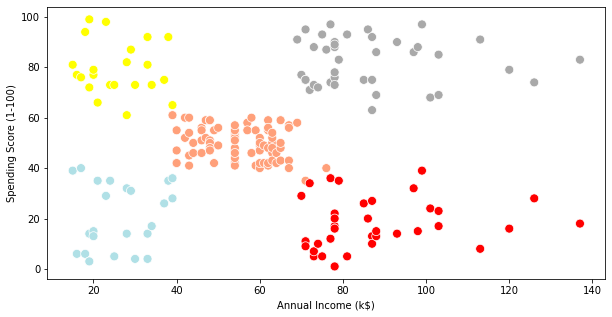

In [44]:
plt.figure(figsize=(10, 5))
color = np.array(['darkgray', 'lightsalmon', 'powderblue', 'red', 'yellow'])
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], c = color[kmodel.labels_], s = 80);

# Conclusions:
• black color people have very low income and expenditure is very low.

• yellow color people have high annual income and low expenditure.

• red color people have very avarge income and are avarge spending .

• blue color people low  annual income and are spending more.

• orange color people have high annual and their expenditure is very high.